In [1]:
import nltk
nltk.download('punkt')

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

[nltk_data] Downloading package punkt to C:\Users\Priyanka
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

In [4]:
df_test.head()

id                                              title  \
0  20800  Specter of Trump Loosens Tongues, if Not Purse...   
1  20801  Russian warships ready to strike terrorists ne...   
2  20802  #NoDAPL: Native American Leaders Vow to Stay A...   
3  20803  Tim Tebow Will Attempt Another Comeback, This ...   
4  20804                    Keiser Report: Meme Wars (E995)   

                    author                                               text  
0         David Streitfeld  PALO ALTO, Calif.  —   After years of scorning...  
1                      NaN  Russian warships ready to strike terrorists ne...  
2            Common Dreams  Videos #NoDAPL: Native American Leaders Vow to...  
3            Daniel Victor  If at first you don’t succeed, try a different...  
4  Truth Broadcast Network  42 mins ago 1 Views 0 Comments 0 Likes 'For th...

# Exploratory Data Analysis

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [7]:
## Check the Null Values 
df_train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
## Check the Null Values 
df_test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [9]:
#filling NULL values with empty string
df_train=df_train.fillna('')
df_test=df_test.fillna('')

<AxesSubplot:xlabel='label', ylabel='count'>

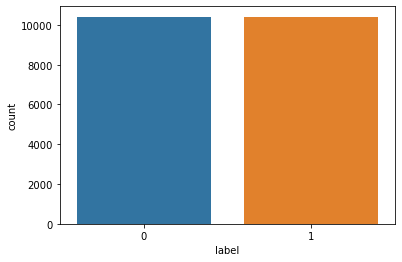

In [10]:
import seaborn as sns
sns.countplot(x='label', data = df_train)

In [11]:
# combine title and text together
df_train['original'] = df_train['title'] + ' ' + df_train['text']
df_train.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1  Ever get the feeling your life circles the rou...      0   
2  Why the Truth Might Get You Fired October 29, ...      1   
3  Videos 15 Civilians Killed In Single US Airstr...      1   
4  Print \nAn Iranian woman has been sentenced to...      1   

                                            original  
0  House Dem Aide: We Didn’t Even See Comey’s Let...  
1  FLYNN: Hillary Clinton, Big Woman on Campus - ...  
2  Why the Truth Might Get You Fired Why the Trut...  
3  15 Civilians Killed In Single US Airstrike Hav...  
4  Iranian woman jailed for fictional unpublished...

In [12]:
# combine title and text together
df_test['original'] = df_test['title'] + ' ' + df_test['text']
df_test.head()

id                                              title  \
0  20800  Specter of Trump Loosens Tongues, if Not Purse...   
1  20801  Russian warships ready to strike terrorists ne...   
2  20802  #NoDAPL: Native American Leaders Vow to Stay A...   
3  20803  Tim Tebow Will Attempt Another Comeback, This ...   
4  20804                    Keiser Report: Meme Wars (E995)   

                    author                                               text  \
0         David Streitfeld  PALO ALTO, Calif.  —   After years of scorning...   
1                           Russian warships ready to strike terrorists ne...   
2            Common Dreams  Videos #NoDAPL: Native American Leaders Vow to...   
3            Daniel Victor  If at first you don’t succeed, try a different...   
4  Truth Broadcast Network  42 mins ago 1 Views 0 Comments 0 Likes 'For th...   

                                            original  
0  Specter of Trump Loosens Tongues, if Not Purse...  
1  Russian warships ready to strike terrorists ne...  
2  #NoDAPL: Native American Leaders Vow to Stay A...  
3  Tim Tebow Will Attempt Another Comeback, This ...  
4  Keiser Report: Meme Wars (E995) 42 mins ago 1 ...

In [13]:
df_train['original'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House In

# Data Preprocessing & Cleaning

In [14]:
# download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\Priyanka
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','said']) # add additional stop words to remove

In [16]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
# Remove stopwords and remove words with 2 or less characters using gensim
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [18]:
# Apply the function to the dataframe
df_train['clean'] = df_train['original'].apply(preprocess)

In [19]:
# Show original news
df_train['original'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House In

In [20]:
# Show cleaned up news after removing stopwords
print(df_train['clean'][0])

['house', 'aide', 'comey', 'letter', 'jason', 'chaffetz', 'tweeted', 'house', 'aide', 'comey', 'letter', 'jason', 'chaffetz', 'tweeted', 'darrell', 'lucus', 'october', 'subscribe', 'jason', 'chaffetz', 'stump', 'american', 'fork', 'utah', 'image', 'courtesy', 'michael', 'jolley', 'available', 'creative', 'commons', 'license', 'apologies', 'keith', 'olbermann', 'doubt', 'worst', 'person', 'world', 'week', 'director', 'james', 'comey', 'according', 'house', 'democratic', 'aide', 'looks', 'like', 'know', 'second', 'worst', 'person', 'turns', 'comey', 'sent', 'infamous', 'letter', 'announcing', 'looking', 'emails', 'related', 'hillary', 'clinton', 'email', 'server', 'ranking', 'democrats', 'relevant', 'committees', 'hear', 'comey', 'tweet', 'republican', 'committee', 'chairmen', 'know', 'comey', 'notified', 'republican', 'chairmen', 'democratic', 'ranking', 'members', 'house', 'intelligence', 'judiciary', 'oversight', 'committees', 'agency', 'reviewing', 'emails', 'recently', 'discovered',

In [21]:
df_train.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1  Ever get the feeling your life circles the rou...      0   
2  Why the Truth Might Get You Fired October 29, ...      1   
3  Videos 15 Civilians Killed In Single US Airstr...      1   
4  Print \nAn Iranian woman has been sentenced to...      1   

                                            original  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2  Why the Truth Might Get You Fired Why the Trut...   
3  15 Civilians Killed In Single US Airstrike Hav...   
4  Iranian woman jailed for fictional unpublished...   

                                               clean  
0  [house, aide, comey, letter, jason, chaffetz, ...  
1  [flynn, hillary, clinton, woman, campus, breit...  
2  [truth, fired, truth, fired, october, tension,...  
3  [civilians, killed, single, airstrike, identif...  
4  [iranian, woman, jailed, fictional, unpublishe...

In [22]:
# Obtain the total words present in the dataset
list_of_words = []
for i in df_train.clean:
    for j in i:
        list_of_words.append(j)

In [23]:
list_of_words

['house',
 'aide',
 'comey',
 'letter',
 'jason',
 'chaffetz',
 'tweeted',
 'house',
 'aide',
 'comey',
 'letter',
 'jason',
 'chaffetz',
 'tweeted',
 'darrell',
 'lucus',
 'october',
 'subscribe',
 'jason',
 'chaffetz',
 'stump',
 'american',
 'fork',
 'utah',
 'image',
 'courtesy',
 'michael',
 'jolley',
 'available',
 'creative',
 'commons',
 'license',
 'apologies',
 'keith',
 'olbermann',
 'doubt',
 'worst',
 'person',
 'world',
 'week',
 'director',
 'james',
 'comey',
 'according',
 'house',
 'democratic',
 'aide',
 'looks',
 'like',
 'know',
 'second',
 'worst',
 'person',
 'turns',
 'comey',
 'sent',
 'infamous',
 'letter',
 'announcing',
 'looking',
 'emails',
 'related',
 'hillary',
 'clinton',
 'email',
 'server',
 'ranking',
 'democrats',
 'relevant',
 'committees',
 'hear',
 'comey',
 'tweet',
 'republican',
 'committee',
 'chairmen',
 'know',
 'comey',
 'notified',
 'republican',
 'chairmen',
 'democratic',
 'ranking',
 'members',
 'house',
 'intelligence',
 'judiciary',

In [24]:
len(list_of_words)

7379667

In [25]:
# Obtain the total number of unique words (using set())
total_words = len(list(set(list_of_words)))
total_words

168668

In [26]:
# join the words into a string (words seperated by " ")
df_train['clean_joined'] = df_train['clean'].apply(lambda x: " ".join(x))

In [27]:
df_train

id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiumnews.com   
3                                Jessica Purkiss   
4                                 Howard Portnoy   
...                                          ...   
20795                              Jerome Hudson   
20796                           Benjamin Hoffman   
20797  Michael J. de la Merced and Rachel Abrams   
20798                                Alex Ansary   
20799                              David Swanson   

                                                    text  label  \
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1      Ever get the feeling your life circles the rou...      0   
2      Why the Truth Might Get You Fired October 29, ...      1   
3      Videos 15 Civilians Killed In Single US Airstr...      1   
4      Print \nAn Iranian woman has been sentenced to...      1   
...                                                  ...    ...   
20795  Rapper T. I. unloaded on black celebrities who...      0   
20796  When the Green Bay Packers lost to the Washing...      0   
20797  The Macy’s of today grew from the union of sev...      0   
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1   
20799    David Swanson is an author, activist, journa...      1   

                                                original  \
0      House Dem Aide: We Didn’t Even See Comey’s Let...   
1      FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2      Why the Truth Might Get You Fired Why the Trut...   
3      15 Civilians Killed In Single US Airstrike Hav...   
4      Iranian woman jailed for fictional unpublished...   
...                                                  ...   
20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  What Keeps the F-35 Alive   David Swanson is a...   

                                                   clean  \
0      [house, aide, comey, letter, jason, chaffetz, ...   
1      [flynn, hillary, clinton, woman, campus, breit...   
2      [truth, fired, truth, fired, october, tension,...   
3      [civilians, killed, single, airstrike, identif...   
4      [iranian, woman, jailed, fictional, unpublishe...   
...                                                  ...   
20795  [rapper, trump, poster, child, white, supremac...   
20796  [playoffs, schedule, matchups, odds, york, tim...   
20797  [macy, receive, takeover, approach, hudson, yo...   
20798  [nato, russia, hold, parallel, exercises, balk...   
20799  [keeps, alive, david, swanson, author, activis...   

                                            clean_joined  
0      house aide comey letter jason chaffetz tweeted...  
1      flynn hillary clinton woman campus breitbart f...  
2      truth fired truth fired october tension intell...  
3      civilians killed single airstrike identified v...  
4      iranian woman jailed fictional 

In [28]:
df_train['clean_joined'][0]

'house aide comey letter jason chaffetz tweeted house aide comey letter jason chaffetz tweeted darrell lucus october subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative commons license apologies keith olbermann doubt worst person world week director james comey according house democratic aide looks like know second worst person turns comey sent infamous letter announcing looking emails related hillary clinton email server ranking democrats relevant committees hear comey tweet republican committee chairmen know comey notified republican chairmen democratic ranking members house intelligence judiciary oversight committees agency reviewing emails recently discovered order contained classified information long letter went oversight committee chairman jason chaffetz political world ablaze tweet informed learned existence emails appear pertinent investigation case reopened jason chaffetz jasoninthehouse october course know case comey actually sa

# Data visualization for cleaned dataset

In [29]:
df_train.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1  Ever get the feeling your life circles the rou...      0   
2  Why the Truth Might Get You Fired October 29, ...      1   
3  Videos 15 Civilians Killed In Single US Airstr...      1   
4  Print \nAn Iranian woman has been sentenced to...      1   

                                            original  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2  Why the Truth Might Get You Fired Why the Trut...   
3  15 Civilians Killed In Single US Airstrike Hav...   
4  Iranian woman jailed for fictional unpublished...   

                                               clean  \
0  [house, aide, comey, letter, jason, chaffetz, ...   
1  [flynn, hillary, clinton, woman, campus, breit...   
2  [truth, fired, truth, fired, october, tension,...   
3  [civilians, killed, single, airstrike, identif...   
4  [iranian, woman, jailed, fictional, unpublishe...   

                                        clean_joined  
0  house aide comey letter jason chaffetz tweeted...  
1  flynn hillary clinton woman campus breitbart f...  
2  truth fired truth fired october tension intell...  
3  civilians killed single airstrike identified v...  
4  iranian woman jailed fictional unpublished sto...

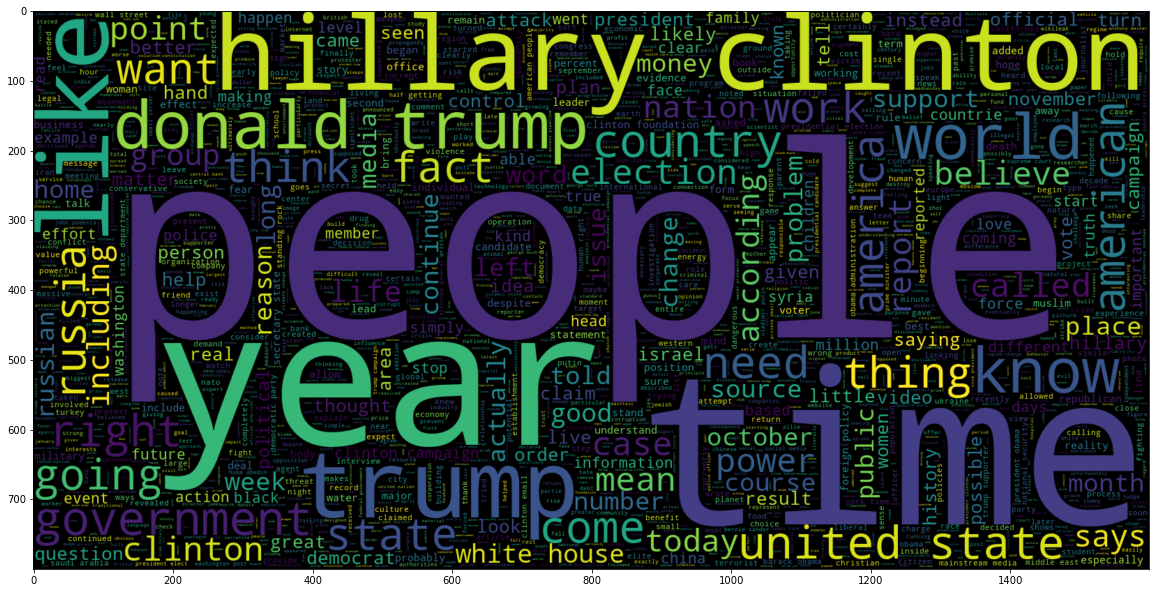

In [30]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df_train[df_train.label == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

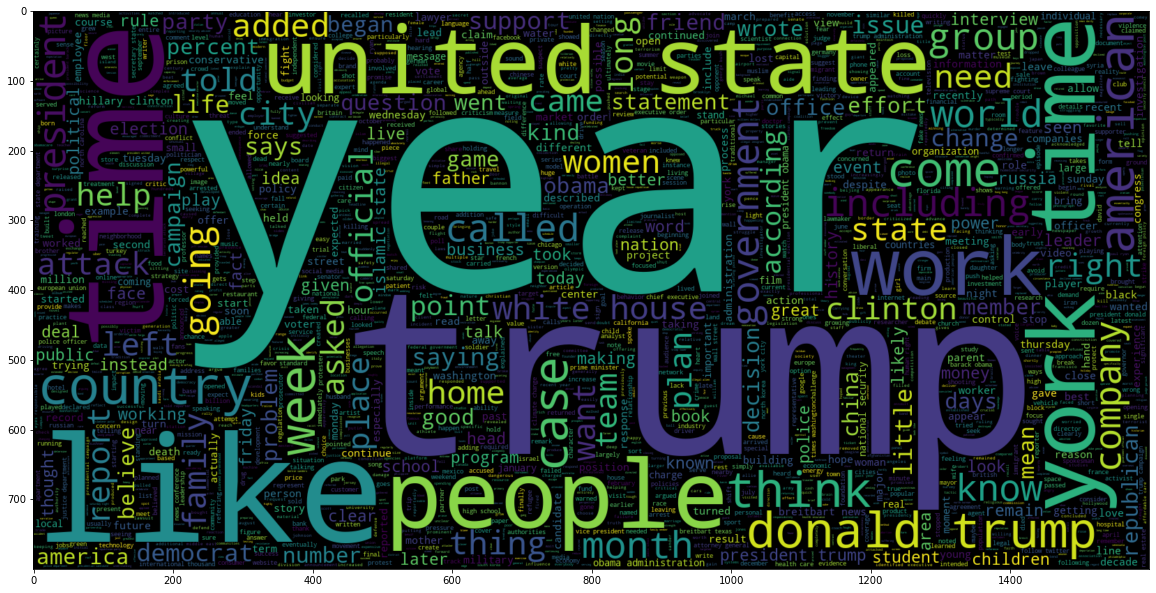

In [31]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df_train[df_train.label == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [32]:
# return all the tokens (each and every single word) as an array of tokens
nltk.word_tokenize(df_train['clean_joined'][1])

['flynn',
 'hillary',
 'clinton',
 'woman',
 'campus',
 'breitbart',
 'feeling',
 'life',
 'circles',
 'roundabout',
 'heads',
 'straight',
 'line',
 'intended',
 'destination',
 'hillary',
 'clinton',
 'remains',
 'woman',
 'campus',
 'leafy',
 'liberal',
 'wellesley',
 'massachusetts',
 'votes',
 'likely',
 'inauguration',
 'dress',
 'remainder',
 'days',
 'miss',
 'havisham',
 'forever',
 'wore',
 'wedding',
 'dress',
 'speaking',
 'great',
 'expectations',
 'hillary',
 'rodham',
 'overflowed',
 'years',
 'addressed',
 'wellesley',
 'graduating',
 'class',
 'president',
 'college',
 'informed',
 'gathered',
 'students',
 'needed',
 'debate',
 'ascertain',
 'spokesman',
 'kind',
 'like',
 'democratic',
 'primaries',
 'minus',
 'terms',
 'unknown',
 'seven',
 'sisters',
 'school',
 'glad',
 'miss',
 'adams',
 'clear',
 'speaking',
 'today',
 'miss',
 'rodham',
 'told',
 'classmates',
 'appointing',
 'edger',
 'bergen',
 'charlie',
 'mccarthys',
 'mortimer',
 'snerds',
 'attendance',
 

In [33]:
# length of maximum document will be needed to create word embeddings 
maxlen = -1
for doc in df_train.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 13689


In [34]:
# visualize the distribution of number of words in a text
import plotly.express as px #interactive visualizations
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df_train.clean_joined], nbins = 100)
fig.show()

# Tokenization and Padding

Tokenization allows us to vectorize text corpos by tuning each text into a sequence of integers

In [35]:
# split data into test and train 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_train.clean_joined, df_train.label, test_size = 0.2)

In [36]:
from nltk import word_tokenize

In [37]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [38]:
len(train_sequences)

16640

In [39]:
len(test_sequences)

4160

In [40]:
print("The encoding for document\n",df_train.clean_joined[0],"\n is : ",train_sequences[0])

The encoding for document
 house aide comey letter jason chaffetz tweeted house aide comey letter jason chaffetz tweeted darrell lucus october subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative commons license apologies keith olbermann doubt worst person world week director james comey according house democratic aide looks like know second worst person turns comey sent infamous letter announcing looking emails related hillary clinton email server ranking democrats relevant committees hear comey tweet republican committee chairmen know comey notified republican chairmen democratic ranking members house intelligence judiciary oversight committees agency reviewing emails recently discovered order contained classified information long letter went oversight committee chairman jason chaffetz political world ablaze tweet informed learned existence emails appear pertinent investigation case reopened jason chaffetz jasoninthehouse october course k

In [41]:
# Add padding can either be maxlen = 4406 or smaller number maxlen = 40 seems to work well based on results
# Make sure all different samples have the same length (fillted 0 s for missing)
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post')

In [42]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [10662  4941  2089  7281     1 26076 10662  4941    91    83   866 10663
   868     5    30     1   465   123   177 10461  1232  1388  4771  2050
    33  2058  9057  6174  1676 26076   406     1  4815  7159 39872   606
  3614  1632    39    98]
The padded encoding for document 2  is :  [15777     5  1233  3838   764    91   210 15479    77   168   189   591
  4168 15777     7   337     5   417  4772   469  1233  3838   764   705
   533  9708 12625   402  1611   168  1457    17  2940    57 15777     7
   337     5   417  4772]


# Model

In [43]:
# Sequential Model
model = Sequential()

# embeddidng layer
model.add(Embedding(total_words, output_dim = 128))
# model.add(Embedding(total_words, output_dim = 240))


# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128))) # no of neurons

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid')) # reason: we do binary classification here
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         21589504  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 21,885,697
Trainable params: 21,885,697
Non-trainable params: 0
_________________________________________________________________


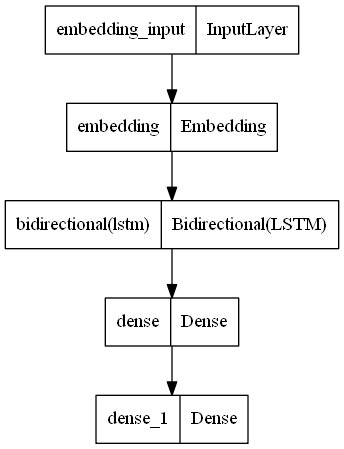

In [44]:
# plot graph
plot_model(model, to_file='fake_news.png')

In [53]:
# save the whole model
model.save("./fake_model.h5")

In [45]:
total_words

168668

In [46]:
y_train = np.asarray(y_train)

In [47]:
# train the model
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 5)

Epoch 1/5
234/234 [==============================] - 9s 24ms/step - loss: 0.1840 - acc: 0.9287 - val_loss: 0.1107 - val_acc: 0.9609
Epoch 2/5
234/234 [==============================] - 5s 21ms/step - loss: 0.0213 - acc: 0.9939 - val_loss: 0.1164 - val_acc: 0.9597
Epoch 3/5
234/234 [==============================] - 5s 21ms/step - loss: 0.0040 - acc: 0.9990 - val_loss: 0.2153 - val_acc: 0.9597
Epoch 4/5
234/234 [==============================] - 5s 21ms/step - loss: 1.4789e-04 - acc: 1.0000 - val_loss: 0.2295 - val_acc: 0.9591
Epoch 5/5
234/234 [==============================] - 5s 21ms/step - loss: 9.9644e-06 - acc: 1.0000 - val_loss: 0.2490 - val_acc: 0.9591


# Model Prediction & Performance

In [48]:
# make prediction
pred = model.predict(padded_test)

130/130 [==============================] - 1s 5ms/step


In [49]:
# if the predicted value is >0.5 it is real else it is fake
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [50]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.9591346153846154


<AxesSubplot:>

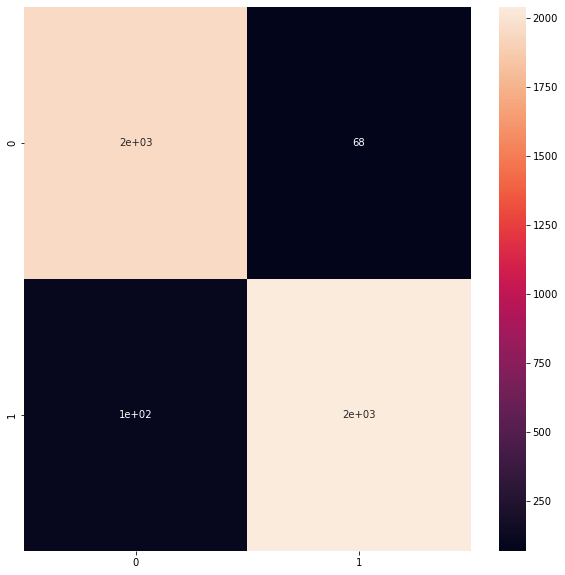

In [51]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [52]:
# category dict
category = { 0: 'Fake News', 1 : "Real News"}